# PCA and Kmeans


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics


import math

In [2]:
pd.read_clipboard

<function pandas.io.clipboards.read_clipboard>

### Reading the file 

In [3]:
try:
    data = pd.read_csv("/home/faculty/millbr02/pub/mushrooms.csv")
except:
    data = pd.read_csv("../../Notebooks/mushrooms.csv")



In [4]:
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


**Separating features and label**

In [5]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [6]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Kinds of Learning
* Supervised
    * We know the answer ahead of time and use that in our model building
    * Regression
    * Naive Bayes
    * SVM
    * Decision Trees
    
* Unsupervised
    * We don't know the answer and just want to explore and see what we might find out
    * K-Means
    * PCA

## The Classification Task

* We have a known set of classes
* Find a way to map a sample/observation onto one of those classes

# Principal Component Analysis

Finding the dimensions that explain the most variance.  What is Variance??

$$s^2 = \frac{\sum{(X_i-\bar{X}_i)}^2}{n}$$

Standard deviation is the square root of the variance and is the average distance from the mean to a point in the data set.

<img src="pca1.png" width="40%" />

<img src="pca2.png" width="40%" />

<img src="pca3.png" width="40%" />

<img src="pca4.png" width="40%" />


This is a [really nice visualization](http://setosa.io/ev/principal-component-analysis/)

In [7]:
x = pd.DataFrame({'x':[1,2,3],'y':[4,5,6],'z':[1,2,3]})

In [8]:
x

,x,y,z
0,1,4,1
1,2,5,2
2,3,6,3


In [9]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 2.28206623e-01, -3.45472088e-01, -1.42442514e+00, ...,
        -4.77328626e-03,  1.59389715e-02, -2.28649779e-18],
       [-1.93656097e+00,  4.79691211e+00, -3.51166784e+00, ...,
        -8.26328489e-02, -2.67620525e-02,  6.25402190e-18],
       [-1.65417317e+00,  2.46436226e+00, -3.88082715e+00, ...,
        -1.71537564e-01, -5.40422856e-02,  2.77435934e-18],
       ...,
       [-1.86050705e+00,  4.70243677e-01,  1.19021189e+00, ...,
         3.69160360e-02,  3.15711395e-01,  1.00738231e-19],
       [ 7.29306843e+00, -1.25169255e+00, -1.24197629e+00, ...,
        -3.63539333e-02, -1.08423374e-02, -5.72276181e-21],
       [-4.83553281e+00, -3.58375805e+00, -1.12506072e-01, ...,
         7.09579221e-03,  2.53977985e-01,  1.06820608e-20]])

In [11]:
covariance=pca.get_covariance()
#covariance

How much does variance each variable (dimension) explain??

In [12]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.37587333e-01, 1.65810984e-01, 1.22858213e-01, 6.79661067e-02,
       5.83117349e-02, 5.09253861e-02, 4.67084060e-02, 3.90841562e-02,
       3.57787686e-02, 2.59161299e-02, 1.99543354e-02, 1.02953397e-02,
       5.54492043e-03, 4.24171932e-03, 3.45031536e-03, 2.04039590e-03,
       1.51233674e-03, 1.24477475e-03, 4.89804172e-04, 2.24486721e-04,
       5.43532716e-05, 3.18508486e-37])

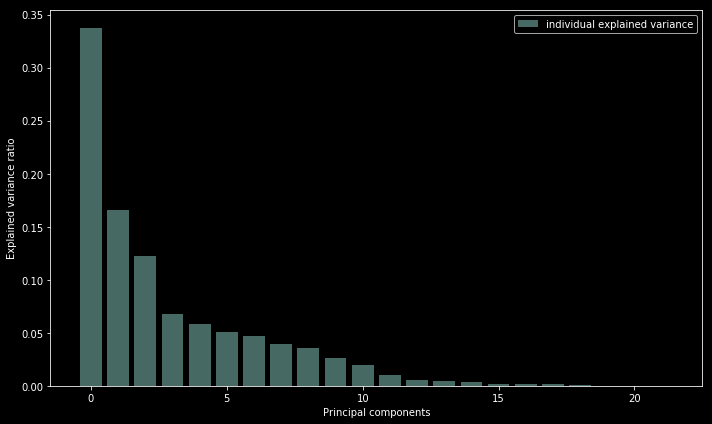

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 6))
    
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**We can see that the last 4 components has less amount of variance  of the data.The 1st 17 components retains more than 90% of the data.**

### Let us take only first two principal components and visualise it using K-means clustering

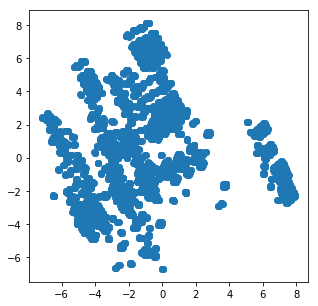

In [14]:
x = pca.fit_transform(X)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])    # first two dimensions
plt.show()

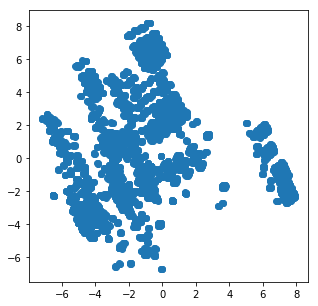

In [15]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(data)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])    # first two dimensions
plt.show()

kmeans clustering [Good Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) Another good visual from [Stanford](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)

## Using kMeans

In [16]:
N

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]])

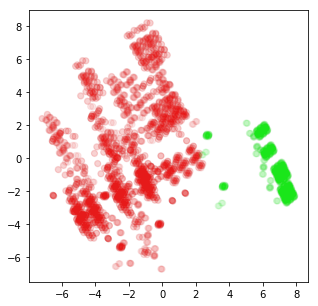

In [17]:
from sklearn.cluster import KMeans
N = data.values
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : (0.1, 0.9, 0.1, 0.05),  # edible
                   1 : (0.9, 0.1, 0.1, 0.05)   # poison
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [18]:
X_clustered

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [19]:
list(X_clustered == y).count(True) / len(y)

0.29098966026587886

If our cluster numbers appear to be misaligned, we can remap them easily with the numpy where function

In [20]:
X_clustered = np.where(X_clustered == 0, 1, 0)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y, X_clustered)

0.7090103397341211

In [22]:
metrics.confusion_matrix(y, X_clustered, labels=[0,1 ])

array([[4016,  192],
       [2172, 1744]])

The above tells us that  we correctly classified 4000 edible mushrooms as edible and 208 edible mushrooms as poison.  We classified 2174 poison mushrooms as edible and 1744 as poison.   Youch!!

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y, X_clustered, target_names=['edible','poison']))

             precision    recall  f1-score   support

     edible       0.65      0.95      0.77      4208
     poison       0.90      0.45      0.60      3916

avg / total       0.77      0.71      0.69      8124



Precision:  How many edible mushrooms did the model correctly predict to be edible out of all the mushrooms predicted to be edible:  $\frac{4000}{4000+2172}$

Recall:  How many mushrooms did we predict to be edible out of all the edible mushrooms $\frac{4000}{4208}$

f1-score: is the harmonic average of the precision and recall.  What is a harmonic mean?  The harmonic mean can be expressed as the reciprocal of the arithmetic mean of the reciprocals of the given set of observations. Seriously?? It  is often used to calculate the means of rates or ratios.

(array([4208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3916.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

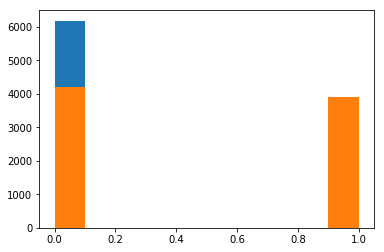

In [24]:
plt.hist(X_clustered)
plt.hist(y)

Can we do better with more dimensions?   What aobut using the real values?

1. Try to redo PCA and Kmeans with 10 dimensions
2. Try to redo PCA and Kmeans with 17 dimensions
3. Try to do Kmeans with the original data
4. Create a training and a test set using the train_test_split function.
    * for 10 dimensions do a PCA and build kmeans on the training set, then do a pca on the test set and use that as the input to the kmeans for predictions.  Is that better or worse?
    * Compare Kmeans on the split data against your results for 3.
    

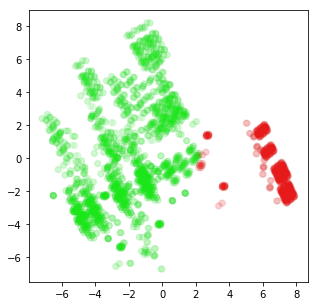

In [38]:
pca = PCA(n_components=3)
N = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : (0.1, 0.9, 0.1, 0.05),  # edible
                   1 : (0.9, 0.1, 0.1, 0.05)   # poison
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [42]:
acc_score = metrics.accuracy_score(y, X_clustered)
acc_score

0.7048252092565239

In [43]:
if acc_score < 0.5:
    X_clustered = np.where(X_clustered == 0, 1, 0)

In [44]:
metrics.accuracy_score(y, X_clustered)

0.7048252092565239

In [40]:
metrics.confusion_matrix(y, X_clustered)

array([[3982,  226],
       [2172, 1744]])

In [45]:
print(metrics.classification_report(y, X_clustered))

             precision    recall  f1-score   support

          0       0.65      0.95      0.77      4208
          1       0.89      0.45      0.59      3916

avg / total       0.76      0.70      0.68      8124



In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [49]:
pca = PCA(n_components=3)
N = pca.fit_transform(X_train)
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit(N)



In [52]:
N = pca.fit_transform(X_test)
X_clustered = kmeans.predict(X_test)



In [55]:
acc_score = metrics.accuracy_score(y_test, X_clustered)
acc_score

0.29107692307692307

In [56]:
if acc_score < 0.5:
    X_clustered = np.where(X_clustered == 0, 1, 0)
    
metrics.accuracy_score(y_test, X_clustered)    

0.7089230769230769